In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [55]:
data = pd.read_csv("supermarket_sales.csv")

# Dataframe Review

In [56]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [4]:
data.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [57]:
data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


# Set data types (datetime)

In [5]:
data['date'] = pd.to_datetime(data['Date'])

In [6]:
data['day'] = (data['date']).dt.day
data['month'] = (data['date']).dt.month
data['year'] = (data['date']).dt.year

In [7]:
data['Time'] = pd.to_datetime(data['Time'])

In [8]:
data['Hour'] = (data['Time']).dt.hour 

# Customer Analysis

In [25]:
data["Customer type"].unique()

array(['Member', 'Normal'], dtype=object)

Text(0.5, 1.0, 'Total Sales')

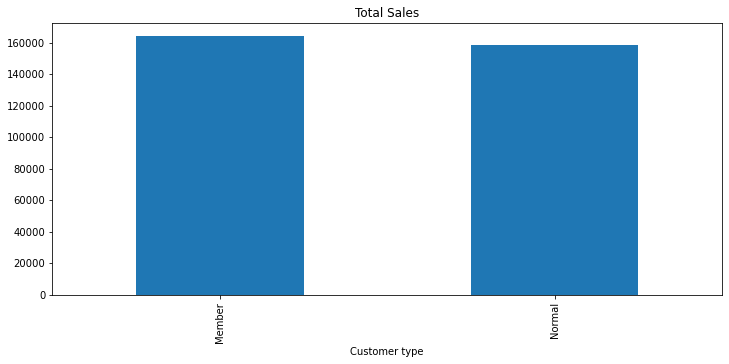

In [19]:
plt.figure(figsize=(12,5))
data.groupby("Customer type")["Total"].sum().plot(kind="bar")
plt.title("Total Sales")

Text(0.5, 1.0, 'Sales by Customer Type')

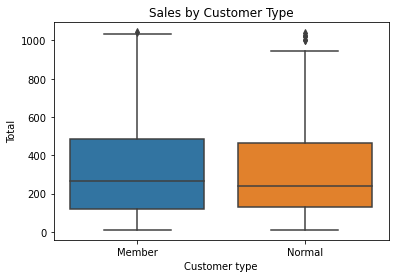

In [20]:
sns.boxplot(x="Customer type", y = "Total" ,data = data).set_title("Sales by Customer Type") 

In [23]:
data.groupby(["Customer type", "Gender"])["Total"].sum().sort_values(ascending=False).reset_index()

,Customer type,Gender,Total
0,Member,Female,88146.9435
1,Normal,Female,79735.9815
2,Normal,Male,79007.3235
3,Member,Male,76076.5005


In [42]:
data.groupby(["Customer type", "Gender"])["Total"].mean().sort_values(ascending=False).reset_index()

,Customer type,Gender,Total
0,Member,Female,337.727753
1,Normal,Female,332.233256
2,Member,Male,316.985419
3,Normal,Male,305.047581


Text(0.5, 1.0, 'Rating by Customer Type')

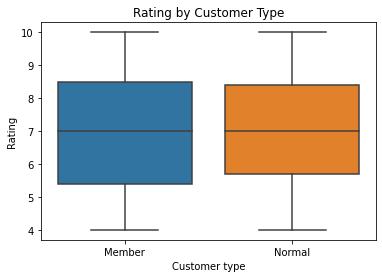

In [26]:
sns.boxplot(x="Customer type", y = "Rating" ,data = data).set_title("Rating by Customer Type") 

Text(0.5, 1.0, 'Rating by Gender')

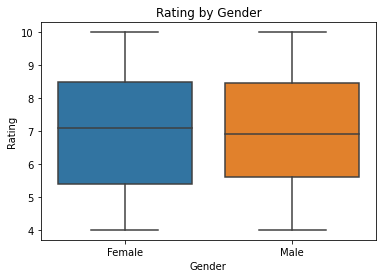

In [27]:
sns.boxplot(x="Gender", y = "Rating" ,data = data).set_title("Rating by Gender") 

In [28]:
data.groupby(["Customer type", "Gender"])["Rating"].mean().sort_values(ascending=False).reset_index()

,Customer type,Gender,Rating
0,Normal,Male,7.018919
1,Normal,Female,6.990417
2,Member,Female,6.940613
3,Member,Male,6.940000


# Geographical Analysis

In [48]:
data.groupby("City")["Total"].sum().sort_values(ascending=False).reset_index()

,City,Total
0,Naypyitaw,110568.7065
1,Yangon,106200.3705
2,Mandalay,106197.6720


In [33]:
data.groupby("City")["Rating"].mean().sort_values(ascending=False)

City
Naypyitaw    7.072866
Yangon       7.027059
Mandalay     6.818072
Name: Rating, dtype: float64

# Time Analysis

Text(0.5, 1.0, 'Sales by Month')

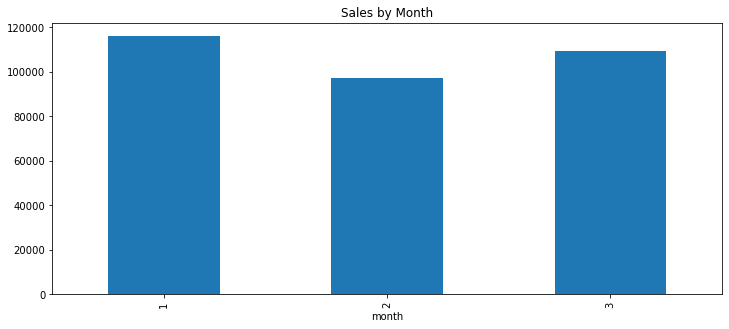

In [40]:
plt.figure(figsize=(12,5))
data.groupby("month")["Total"].sum().plot(kind="bar")
plt.title("Sales by Month")

<AxesSubplot:xlabel='Hour', ylabel='Total'>

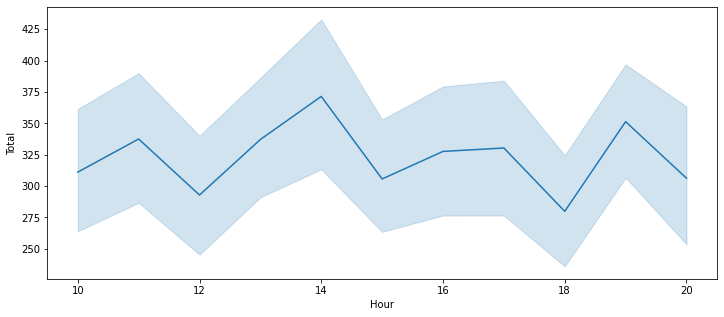

In [35]:
plt.figure(figsize=(12,5))
sns.lineplot(x="Hour",  y = 'Total',data = data)

# Payment Method

Text(0.5, 1.0, 'Number of Operations')

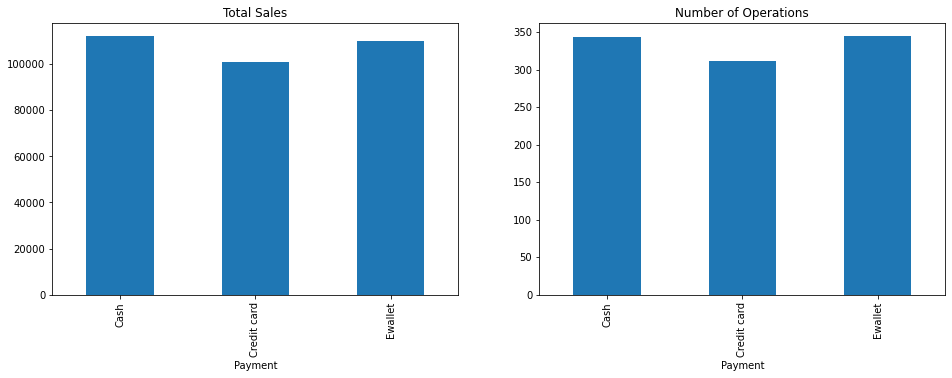

In [54]:
plt.figure(figsize=(16,5))

plt.subplot(1, 2, 1)
data.groupby("Payment")["Total"].sum().plot(kind="bar")
plt.title("Total Sales")

plt.subplot(1, 2, 2)
data.groupby("Payment")["Invoice ID"].count().plot(kind="bar")
plt.title("Number of Operations")

Text(0.5, 1.0, 'Rating by Payment Method')

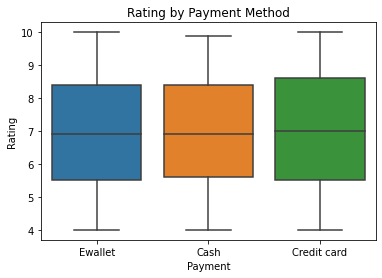

In [53]:
sns.boxplot(x="Payment", y = "Rating" ,data = data).set_title("Rating by Payment Method") 

# Product Analysis

In [59]:
data.groupby("Product line")["Total"].sum().sort_values(ascending=False).reset_index()

,Product line,Total
0,Food and beverages,56144.8440
1,Sports and travel,55122.8265
2,Electronic accessories,54337.5315
3,Fashion accessories,54305.8950
4,Home and lifestyle,53861.9130
5,Health and beauty,49193.7390


In [61]:
data.groupby("Product line")["Invoice ID"].count().sort_values(ascending=False).reset_index()

,Product line,Invoice ID
0,Fashion accessories,178
1,Food and beverages,174
2,Electronic accessories,170
3,Sports and travel,166
4,Home and lifestyle,160
5,Health and beauty,152


Text(0.5, 1.0, 'Rating by Product Line')

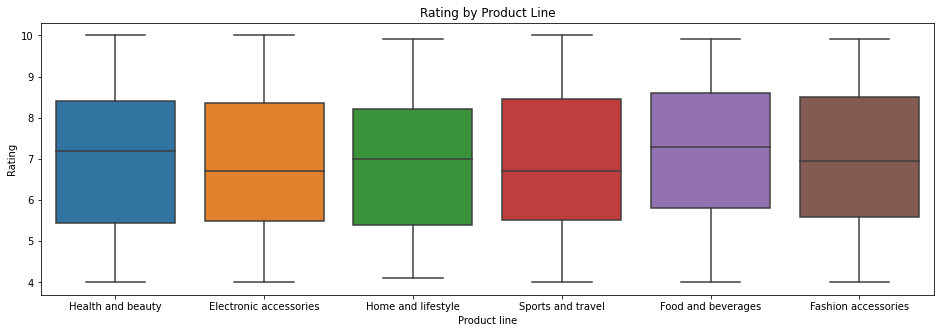

In [64]:
plt.figure(figsize=(16,5))
sns.boxplot(x="Product line", y = "Rating" ,data = data).set_title("Rating by Product Line") 